In [18]:
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [19]:
def load(path):
    train_path = os.path.join(path,'train')
    test_path = os.path.join(path,'test')
    n_classes = len(os.listdir(train_path))
    X = np.zeros((n_classes,105,105,3))
    Y = np.zeros((n_classes,105,105,3))
    labels = {}
    i = 0
    for f in os.listdir(train_path):
        name = f.split('.')[0]
        labels[i] = name
        img_path = os.path.join(train_path,f)
        img = cv2.imread(img_path)
        resize = cv2.resize(img,(105,105),cv2.INTER_AREA)
        X[i,:,:,:] = resize
        i+=1
    for f in os.listdir(test_path):
        img_path = os.path.join(test_path,f)
        img = cv2.imread(img_path)
        resize = cv2.resize(img,(105,105),cv2.INTER_AREA)
        for j in range(n_classes):
            Y[j,:,:,:] = resize    
    return [Y,X],labels

In [20]:
def predict(pairs,labels):
    preds = model.predict(pairs)
    return labels[np.argmax(preds)],np.max(preds)

In [21]:

def concat_images(X):
    """Concatenates a bunch of images into a big matrix for plotting purposes."""
    nc,w,h,ch = X.shape
    n = np.ceil(np.sqrt(nc)).astype("int8")
    img = np.zeros((n*w,n*h,3))
    x = 0
    y = 0
    for example in range(nc):
        img[x*w:(x+1)*w,y*h:(y+1)*h,:] = X[example]
        y += 1
        if y >= n:
            y = 0
            x += 1
    return img


def plot_oneshot_task(pairs):
    """Takes a one-shot task given to a siamese net and  """
    fig,(ax1,ax2) = plt.subplots(2)
    ax1.imshow(pairs[0][0].reshape(105,105,3).astype('uint8'))
    img = concat_images(pairs[1])
    ax1.get_yaxis().set_visible(False)
    ax1.get_xaxis().set_visible(False)
    ax2.imshow(img.astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [22]:
PATH = './datasets/oneshot-test'  # change this according to your image locations
model = load_model("weights-2.h5")  # change this according to your model-weights path

In [23]:
pairs,labels = load(PATH)

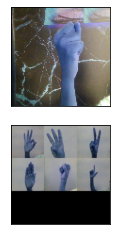

In [24]:
plot_oneshot_task(pairs)

In [25]:
predict(pairs,labels)

('fist', 0.9640496)